<a href="https://colab.research.google.com/github/Razideniwa1607/FinalTask_ID-X-Partner_Data-Scientist_Razi-Deniwa-Z/blob/main/Final_Task_Razi_Deniwa_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deskripsi
Buat machine learning model untuk menentukan mana data yang memiliki risiko kredit dalam bentuk kategori GOOD or BAD

Source : ID/X Partner


In [174]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# Correct path to your CSV file within your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/loan_data_2007_2014.csv'
data = pd.read_csv(file_path)
data.head(10)  # Display the first few rows of the dataframe



<ipython-input-175-d62a97ee47e6>:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Data Understanding

In [176]:
data.shape

(466285, 75)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [178]:
# Mencari jumlah nilai NAN  untuk setiap kolom
data.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [179]:
# drop data kolom yang keseluruhan nilai bernilai NAN
data.dropna(how = 'all',axis=1,inplace=True)
data.loc[10,:]





Unnamed: 0                                                                    10
id                                                                       1070078
member_id                                                                1305201
loan_amnt                                                                   6500
funded_amnt                                                                 6500
funded_amnt_inv                                                           6500.0
term                                                                   60 months
int_rate                                                                   14.65
installment                                                               153.45
grade                                                                          C
sub_grade                                                                     C3
emp_title                                                  Southwest Rural metro
emp_length                  

In [180]:
data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [181]:
# Menghitung persentase nilai null
data.isna().sum()/len(data)

Unnamed: 0                     0.000000
id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.059166
emp_length                     0.045054
home_ownership                 0.000000
annual_inc                     0.000009
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                           0.729820
purpose                        0.000000
title                          0.000045
zip_code                       0.000000
addr_state                     0.000000


###Data Preparation

In [182]:
# Drop data dengan persentasi null  besar
data= data.drop(['desc','mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq','next_pymnt_d'],axis=1)


In [183]:
data.isna().sum()/len(data)

Unnamed: 0                    0.000000
id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.059166
emp_length                    0.045054
home_ownership                0.000000
annual_inc                    0.000009
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000045
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [184]:
# drop kolom [tot_coll_amt,tot_cur_bal,total_rev_hi_lim] karena memiliki nilai Nan yang dominan
data= data.drop(['tot_coll_amt','tot_cur_bal','total_rev_hi_lim'],axis=1)

In [185]:
data.isna().sum()/len(data)

Unnamed: 0                    0.000000
id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.059166
emp_length                    0.045054
home_ownership                0.000000
annual_inc                    0.000009
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000045
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [186]:
# cek cardinality untuk setiap kolom dengan nilai kategorikal
data_object = data.select_dtypes(include='object')
data_object.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64

In [187]:
data['total_rec_late_fee'].value_counts()

total_rec_late_fee
0.000000     455607
15.000000      2223
30.000000       285
45.000000        50
16.840000        15
              ...  
15.026894         1
23.190501         1
14.959976         1
37.751380         1
41.150000         1
Name: count, Length: 5808, dtype: int64

In [188]:
# drop  kolom yang memiliki cardinality tinggi dan kurang relevan
# Data kurang relevan : data yang tidak berkaitan dengan tujuan pembuatan model machine learning
data= data.drop(['emp_title','url','title','zip_code','Unnamed: 0','id','member_id','pymnt_plan','policy_code','application_type','pymnt_plan','issue_d','collections_12_mths_ex_med','addr_state','initial_list_status','recoveries','collection_recovery_fee','acc_now_delinq','total_rec_late_fee','last_pymnt_d','last_credit_pull_d'],axis=1)




In [189]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,13648,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,171.62
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1687,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,119.66
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2956,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,649.91
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,5598,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,357.48
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,27783,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,4 years,MORTGAGE,...,23208,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,432.64
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,10+ years,MORTGAGE,...,18238,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,17.50
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,7 years,MORTGAGE,...,6688,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,514.34
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,3 years,OWN,...,11404,21.5,27.0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,1500.68


### Data Keseluruhan

In [190]:
data.iloc[:,0:10].head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT


In [191]:
data.iloc[:,11:20].head(5)

,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec
0,Verified,Fully Paid,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0
1,Source Verified,Charged Off,car,1.00,0.0,Apr-99,5.0,3.0,0.0
2,Not Verified,Fully Paid,small_business,8.72,0.0,Nov-01,2.0,2.0,0.0
3,Source Verified,Fully Paid,other,20.00,0.0,Feb-96,1.0,10.0,0.0
4,Source Verified,Current,other,17.94,0.0,Jan-96,0.0,15.0,0.0


In [192]:
data.iloc[:,21:30].head(5)

,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,171.62
1,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,119.66
2,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,649.91
3,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,357.48
4,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,67.79


In [193]:
# Cek kolom data yang masih memiliki nilai NAN
data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             21008
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs               29
earliest_cr_line          29
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util               340
total_acc                 29
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_amnt            0
dtype: int64

In [194]:
#penanganan nilai NAN melalui imputasi data dengan mean dan modus
data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)
data['delinq_2yrs'].fillna(0,inplace=True)
data['open_acc'].fillna(data['open_acc'].mean(),inplace=True)
data['pub_rec'].fillna(0,inplace=True)
data['revol_util'].fillna(data['revol_util'].mean(),inplace=True)
data['annual_inc'].fillna(data['annual_inc'].mean(),inplace=True)
data['inq_last_6mths'].fillna(0,inplace=True)
data['total_acc'].fillna(data['total_acc'].mode()[0],inplace=True)
data['earliest_cr_line'].fillna(data['earliest_cr_line'].mode()[0],inplace=True)




In [195]:
#Cek jumlah NAN setelah dilakukan imputasi
data.isna().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_amnt        0
dtype: int64

###EDA

In [196]:
#data.hist(bins=60,figsize=(15,15))

Outlier

In [197]:
numerik = data.select_dtypes(include=['float64', 'int64']).columns
from scipy.stats.mstats import winsorize

# Terapkan winsorizing pada setiap kolom numerik
for feature in numerik:
    data[feature] = winsorize(data[feature], limits=[0.05, 0.05])

data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,13648,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,171.62
1,3500,3500,3250.0,60 months,15.27,114.51,C,C4,< 1 year,RENT,...,1955,14.1,9.0,0.00,0.00,2319.470000,2244.66,1491.87,435.17,121.69
2,3500,3500,3250.0,36 months,15.96,114.51,C,C5,10+ years,RENT,...,2956,92.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,649.91
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,5598,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,357.48
4,3500,3500,3250.0,60 months,12.69,114.51,B,B5,1 year,RENT,...,27783,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,121.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,4 years,MORTGAGE,...,23208,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,432.64
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,10+ years,MORTGAGE,...,18238,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,121.69
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,7 years,MORTGAGE,...,6688,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,514.34
466283,3500,3500,3250.0,36 months,7.90,114.51,A,A4,3 years,OWN,...,11404,21.5,27.0,0.00,0.00,2319.470000,2244.66,2000.00,317.76,1500.68


<Axes: xlabel='count', ylabel='emp_length'>

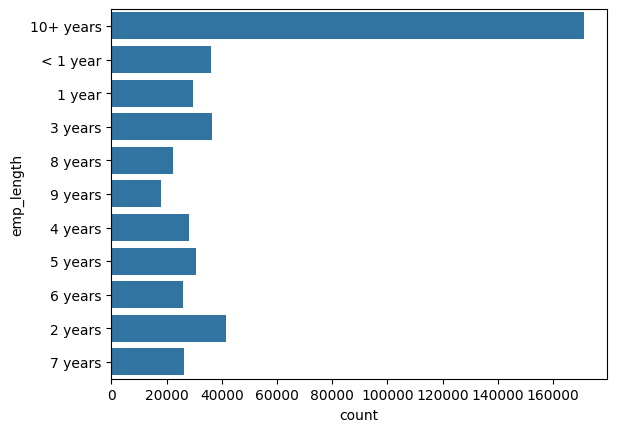

In [198]:
#data['emp_length'].value_counts()
sns.countplot(data,y='emp_length')

In [199]:
data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,14170.213389,14136.471900,14064.733671,13.766917,425.701595,70287.340403,17.180209,0.236722,0.763810,11.033212,...,14739.091026,56.356427,24.814596,4197.346934,4195.412478,11243.965163,11173.379273,8645.727259,2458.556851,2831.650676
std,7747.618647,7717.022155,7748.177517,4.088789,220.155214,32822.782761,7.413355,0.544820,0.949615,4.282981,...,10758.292143,22.661986,10.523014,5742.925828,5740.207437,7251.051096,7235.169974,6272.917959,2005.852841,4515.142698
min,3500.000000,3500.000000,3250.000000,6.990000,114.510000,28000.000000,4.820000,0.000000,0.000000,5.000000,...,1955.000000,14.100000,9.000000,0.000000,0.000000,2319.470000,2244.660000,1491.870000,317.760000,121.690000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,45000.000000,11.360000,0.000000,0.000000,8.000000,...,6413.000000,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,312.620000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,63000.000000,16.870000,0.000000,0.000000,10.000000,...,11764.000000,57.500000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,545.960000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,88953.000000,22.780000,0.000000,1.000000,14.000000,...,20333.000000,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,3187.510000
max,30200.000000,30000.000000,30000.000000,21.700000,900.930000,150000.000000,30.770000,2.000000,3.000000,20.000000,...,40953.000000,92.500000,47.000000,18365.820000,18353.950000,28313.040000,28191.760000,24000.000000,7640.930000,15735.700000


In [200]:
data.describe(include='object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,earliest_cr_line
count,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,11,6,3,9,14,664
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Current,debt_consolidation,Oct-00
freq,337953,136929,31686,171057,235875,168055,224226,274195,3703


In [201]:
data['delinq_2yrs'].value_counts()

delinq_2yrs
0.0    382983
1.0     56224
2.0     27078
Name: count, dtype: int64

###Univariat Analisis

In [202]:
status_mapping = {
    'Current': 'good',
    'Fully Paid': 'good',
    'Charged Off': 'bad',
    'Late (31-120 days)': 'bad',
    'In Grace Period': 'good',
    'Does not meet the credit policy. Status:Fully Paid': 'bad',
    'Late (16-30 days)': 'bad',
    'Default': 'bad',
    'Does not meet the credit policy. Status:Charged Off': 'bad'
}

# Menambahkan kolom label berdasarkan mapping
data['label'] = data['loan_status'].map(status_mapping)
data['label']= data['label'].map({'good':1,'bad':0})

data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,label
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,171.62,1
1,3500,3500,3250.0,60 months,15.27,114.51,C,C4,< 1 year,RENT,...,14.1,9.0,0.00,0.00,2319.470000,2244.66,1491.87,435.17,121.69,0
2,3500,3500,3250.0,36 months,15.96,114.51,C,C5,10+ years,RENT,...,92.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,649.91,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,357.48,1
4,3500,3500,3250.0,60 months,12.69,114.51,B,B5,1 year,RENT,...,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,121.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,4 years,MORTGAGE,...,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,432.64,1
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,10+ years,MORTGAGE,...,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,121.69,0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,7 years,MORTGAGE,...,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,514.34,1
466283,3500,3500,3250.0,36 months,7.90,114.51,A,A4,3 years,OWN,...,21.5,27.0,0.00,0.00,2319.470000,2244.66,2000.00,317.76,1500.68,1


<ipython-input-203-cf78cc60ed69>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=loan_status_counts.index, x=loan_status_counts.values, palette='viridis')


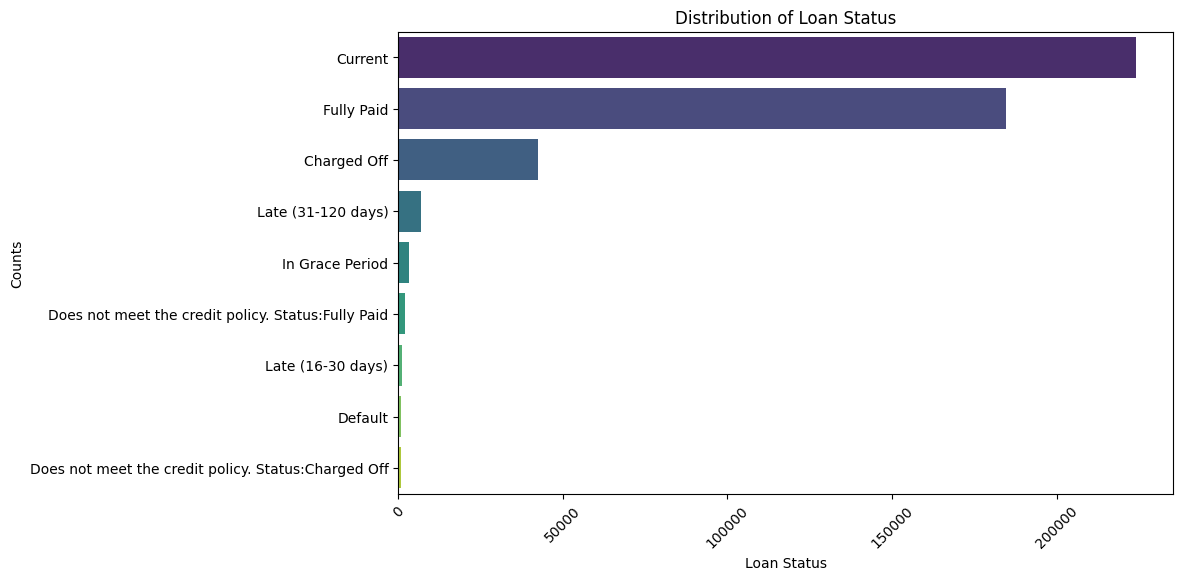

In [203]:


# Hitung jumlah masing-masing loan status
loan_status_counts = data['loan_status'].value_counts()

# Buat bar chart
plt.figure(figsize=(10,6))
sns.barplot(y=loan_status_counts.index, x=loan_status_counts.values, palette='viridis')

# Tambahkan judul dan label sumbu
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Counts')

# Rotasi label x jika perlu
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()



<Axes: ylabel='count'>

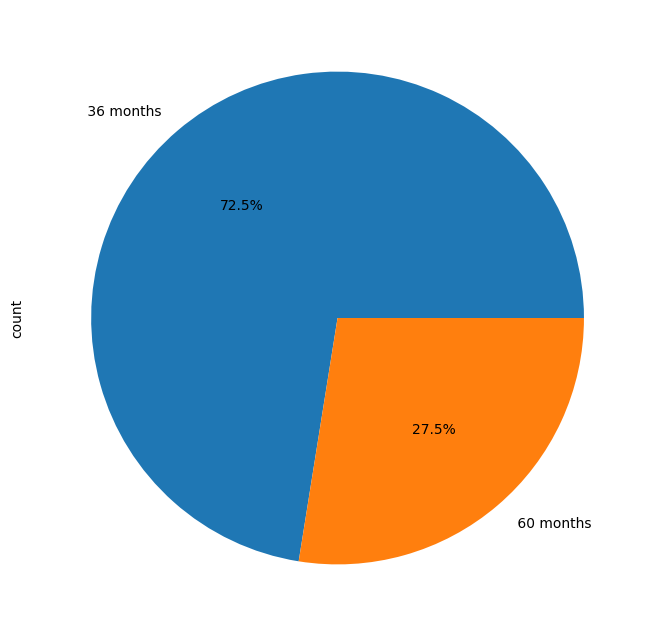

In [204]:
data['term'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=0,figsize=(8,8))


<Axes: ylabel='count'>

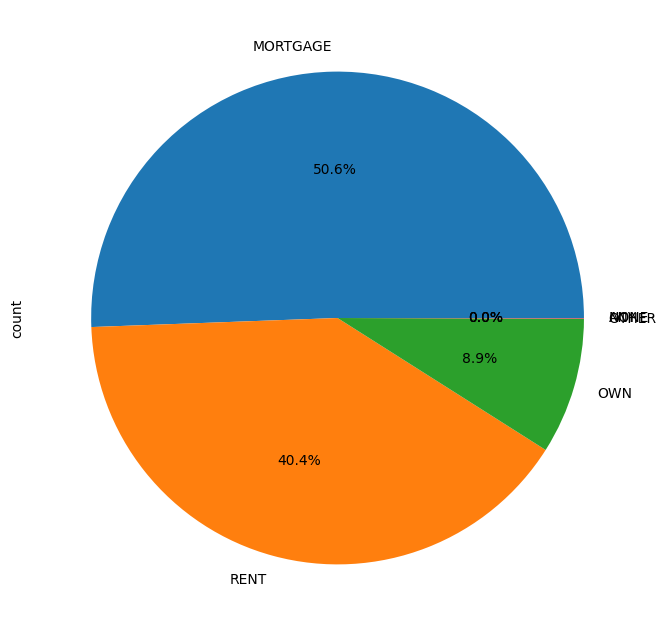

In [205]:
data['home_ownership'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=0,figsize=(8,8))


<Axes: xlabel='grade'>

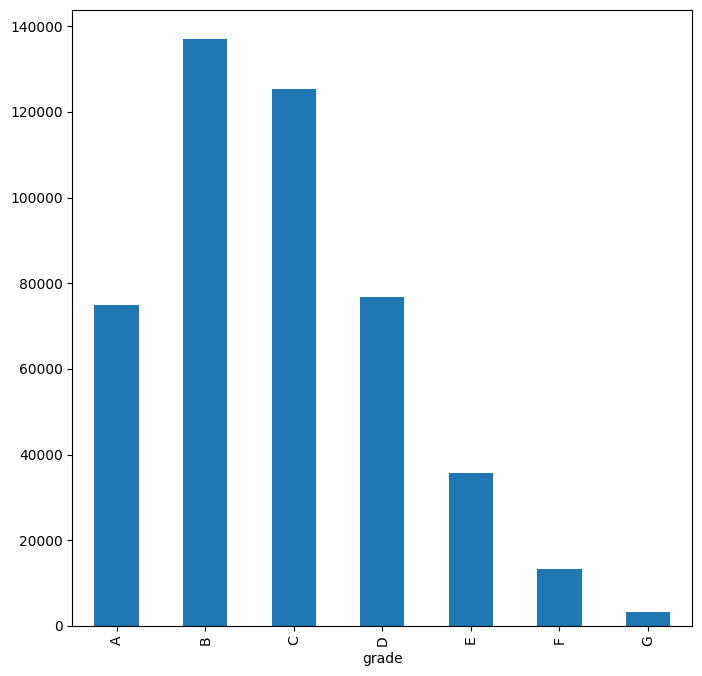

In [206]:
data['grade'].value_counts().sort_index().plot(kind='bar',figsize=(8,8))

In [207]:
data['pub_rec'].mean()
#.plot(kind='bar',figsize=(8,8))

0.1315997726712204

<Axes: xlabel='sub_grade'>

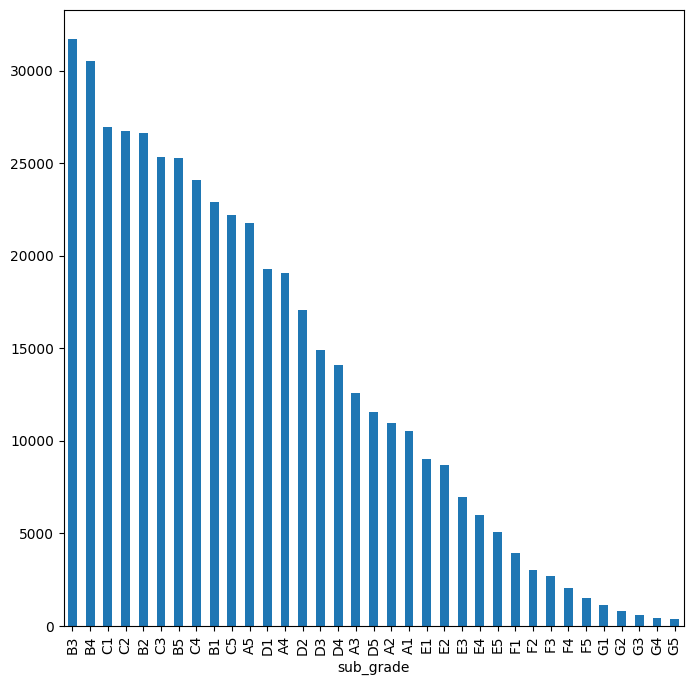

In [208]:
data['sub_grade'].value_counts().plot(kind='bar',figsize=(8,8))

In [209]:
data['loan_amnt'].describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    466285.000000
mean      14170.213389
std        7747.618647
min        3500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       30200.000000
Name: loan_amnt, dtype: float64

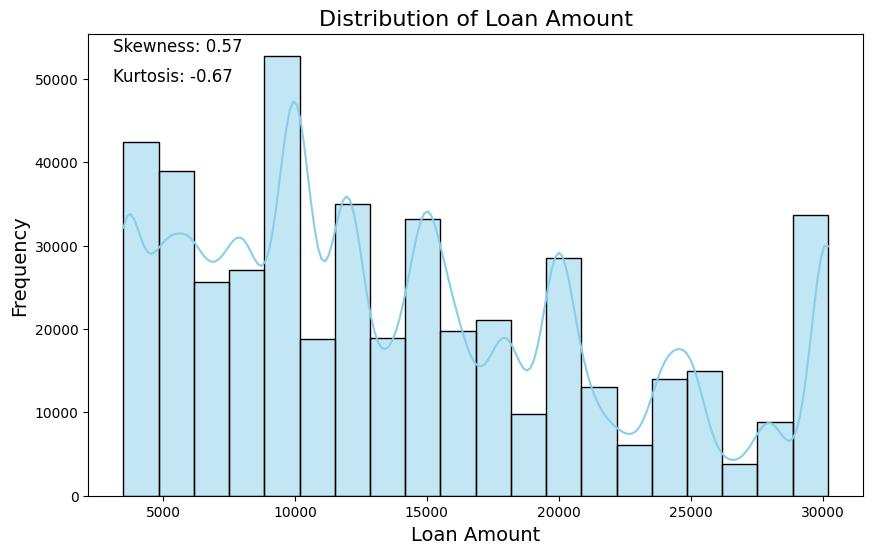

In [210]:


# Menghitung skewness dan kurtosis
loan_amnt_skew = skew(data['loan_amnt'])
loan_amnt_kurtosis = kurtosis(data['loan_amnt'])
# Membuat histogram dengan seaborn untuk tampilan yang lebih baik
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'], bins=20, kde=True, color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Loan Amount', fontsize=16)

# Menambahkan teks untuk skewness dan kurtosis
plt.figtext(0.15, 0.85, f'Skewness: {loan_amnt_skew:.2f}', fontsize=12, color='black')
plt.figtext(0.15, 0.80, f'Kurtosis: {loan_amnt_kurtosis:.2f}', fontsize=12, color='black')

# Menampilkan plot
plt.show()




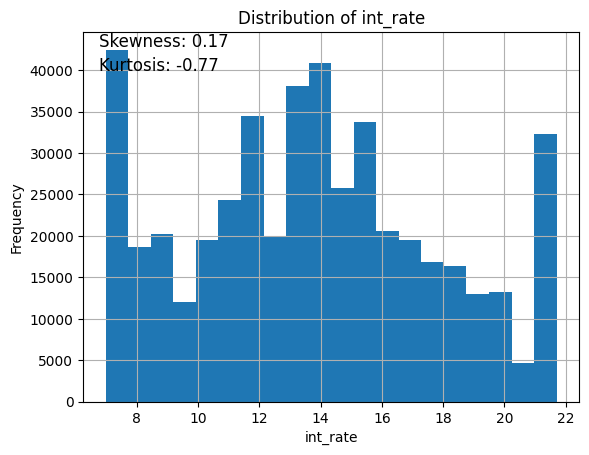

In [211]:
loan_amnt_skew = skew(data['int_rate'])
loan_amnt_kurtosis = kurtosis(data['int_rate'])
data['int_rate'].hist(bins=20)
plt.xlabel('int_rate')
plt.ylabel('Frequency')
plt.title('Distribution of int_rate')
plt.figtext(0.15, 0.85, f'Skewness: {loan_amnt_skew:.2f}', fontsize=12, color='black')
plt.figtext(0.15, 0.80, f'Kurtosis: {loan_amnt_kurtosis:.2f}', fontsize=12, color='black')
plt.show()

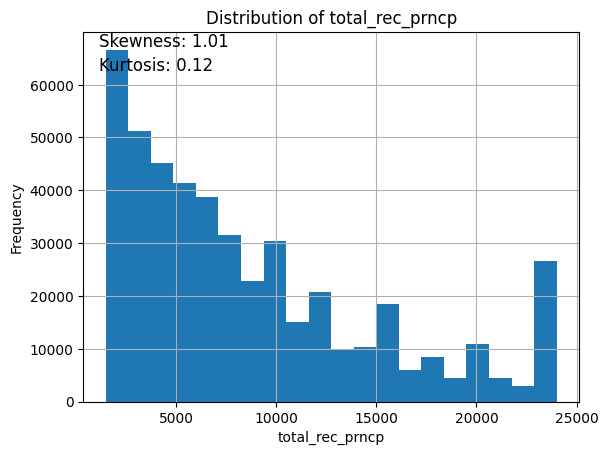

In [212]:

loan_amnt_skew = skew(data['total_rec_prncp'])
loan_amnt_kurtosis = kurtosis(data['total_rec_prncp'])
data['total_rec_prncp'].hist(bins=20)
plt.xlabel('total_rec_prncp')
plt.ylabel('Frequency')
plt.title('Distribution of total_rec_prncp')
plt.figtext(0.15, 0.85, f'Skewness: {loan_amnt_skew:.2f}', fontsize=12, color='black')
plt.figtext(0.15, 0.80, f'Kurtosis: {loan_amnt_kurtosis:.2f}', fontsize=12, color='black')
plt.show()

In [213]:
data['loan_amnt'].skew()

0.5679355631383428

<Axes: xlabel='count', ylabel='verification_status'>

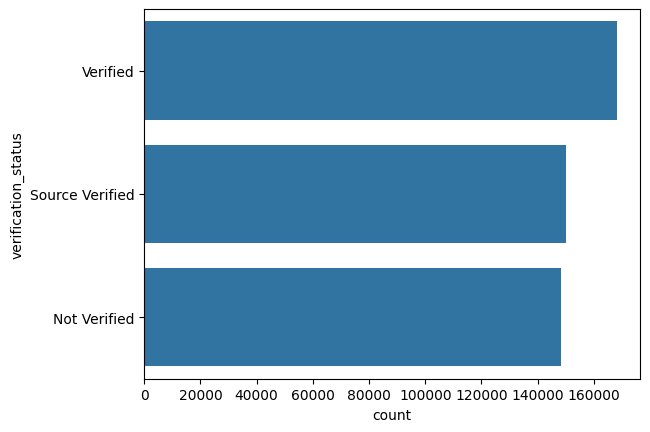

In [214]:

sns.countplot(y='verification_status',data=data)

<Axes: xlabel='count', ylabel='purpose'>

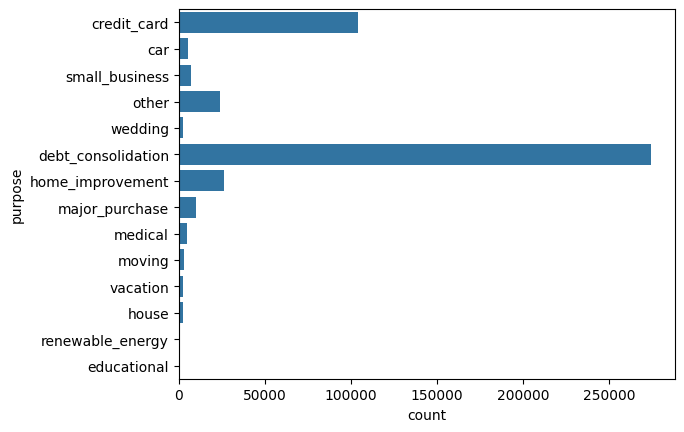

In [215]:

sns.countplot(y='purpose',data=data)

<Axes: xlabel='count', ylabel='grade'>

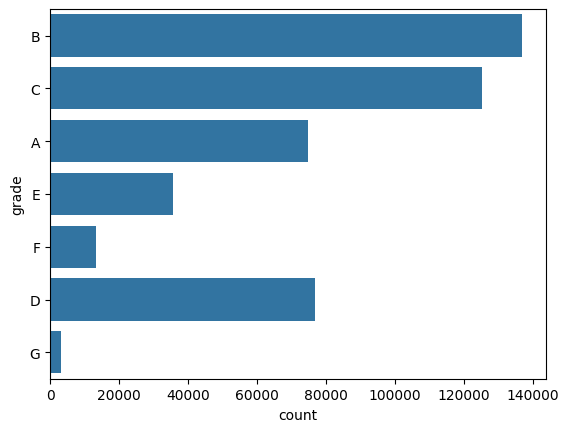

In [216]:
sns.countplot(y='grade',data=data)

<Axes: xlabel='count', ylabel='emp_length'>

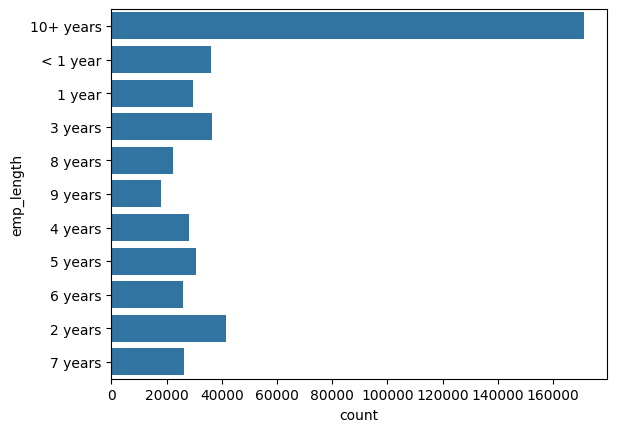

In [217]:
sns.countplot(y='emp_length',data=data)

<Axes: xlabel='home_ownership', ylabel='count'>

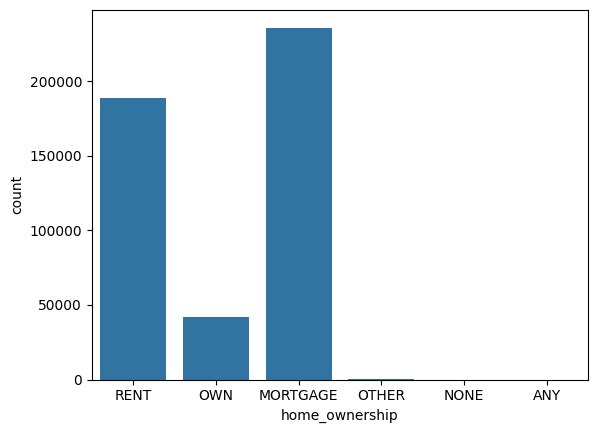

In [218]:
sns.countplot(x='home_ownership',data=data)


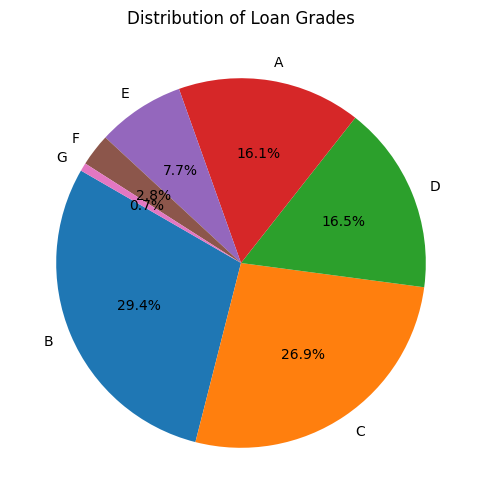

In [219]:


# Hitung jumlah masing-masing nilai dalam kolom 'grade'
grade_counts = data['grade'].value_counts()

# Buat pie chart
plt.figure(figsize=(8,6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=150)

# Tambahkan judul
plt.title('Distribution of Loan Grades')
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


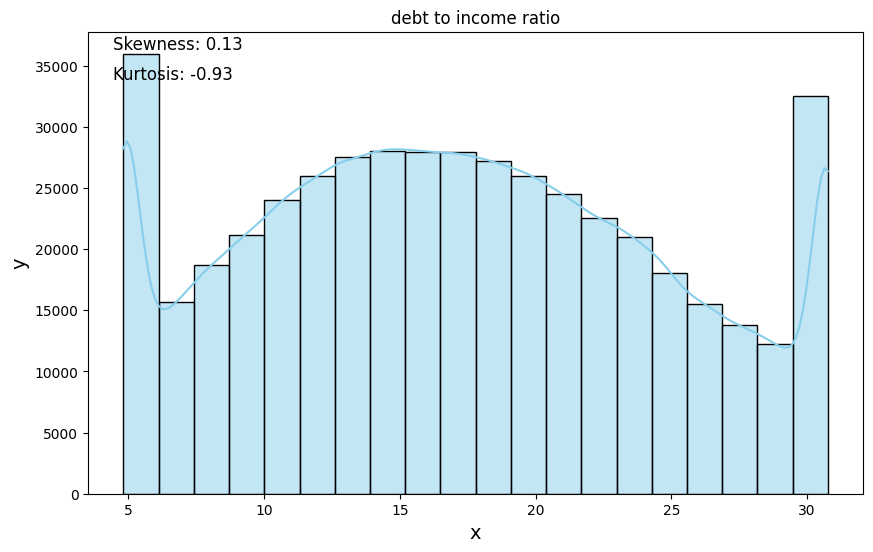

In [220]:
data['dti'].describe()
skew= data['dti'].skew()
kurtosis = data['dti'].kurtosis()
plt.figure(figsize=(10, 6))
sns.histplot(data['dti'],bins=20,kde=True,color='skyblue')
plt.title('debt to income ratio')
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.figtext(0.15, 0.85, f'Skewness: {skew:.2f}', fontsize=12, color='black')
plt.figtext(0.15, 0.80, f'Kurtosis: {kurtosis:.2f}', fontsize=12, color='black')
plt.show()


In [221]:
# Pecah data lagi
data_object = data.select_dtypes(include='object')
data_numeric = data.select_dtypes(include=['int', 'float'])
#data_numeric= data_numeric/data_numeric.max()
#data_numeric

###Feature Engineering sebelum analisis bivariat

In [222]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_length           466285 non-null  object
 4   home_ownership       466285 non-null  object
 5   verification_status  466285 non-null  object
 6   loan_status          466285 non-null  object
 7   purpose              466285 non-null  object
 8   earliest_cr_line     466285 non-null  object
dtypes: object(9)
memory usage: 32.0+ MB


In [223]:
# Ubah tanggal
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'],format='%b-%y')
data['earliest_cr_line_year']= data['earliest_cr_line'].dt.year.astype(int)
data.drop(columns='earliest_cr_line',inplace=True)


In [224]:
label = LabelEncoder()
kolom=['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose']

# Membuat ColumnTransformer
for col in kolom:
  data[col]= label.fit_transform(data[col])
data



,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,label,earliest_cr_line_year
0,5000,5000,4975.0,0,10.65,162.87,1,6,1,5,...,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,171.62,1,1985
1,3500,3500,3250.0,1,15.27,114.51,2,13,10,5,...,9.0,0.00,0.00,2319.470000,2244.66,1491.87,435.17,121.69,0,1999
2,3500,3500,3250.0,0,15.96,114.51,2,14,1,5,...,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,649.91,1,2001
3,10000,10000,10000.0,0,13.49,339.31,2,10,1,5,...,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,357.48,1,1996
4,3500,3500,3250.0,1,12.69,114.51,1,9,0,5,...,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,121.69,1,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,1,14.47,432.64,2,11,4,1,...,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,432.64,1,2003
466281,22000,22000,22000.0,1,19.97,582.50,3,19,1,1,...,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,121.69,0,1997
466282,20700,20700,20700.0,1,16.99,514.34,3,15,7,1,...,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,514.34,1,2001
466283,3500,3500,3250.0,0,7.90,114.51,0,3,3,4,...,27.0,0.00,0.00,2319.470000,2244.66,2000.00,317.76,1500.68,1,2003


###Analisis Bivariat

<Axes: xlabel='grade', ylabel='loan_status'>

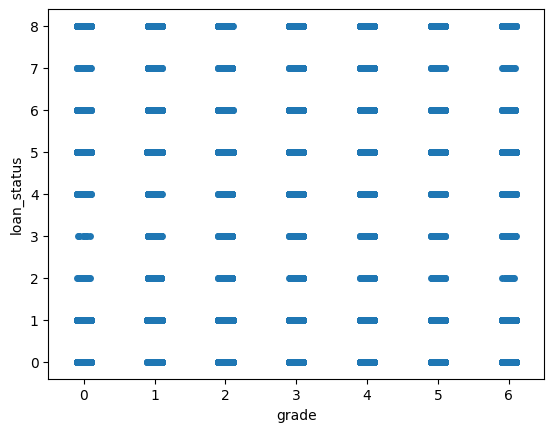

In [225]:
#Template plot
#sns.boxplot(y='loan_status',x='grade',data=data)
#sns.barplot(x='loan_status',y='grade',data=data)
sns.stripplot(y='loan_status',x='grade',data=data)


#plt.show()


<Axes: xlabel='loan_status', ylabel='home_ownership'>

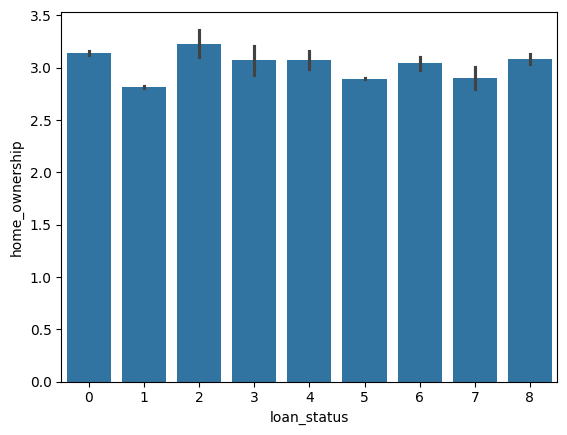

In [226]:
sns.barplot(x='loan_status',y='home_ownership',data=data)

<Axes: xlabel='loan_status', ylabel='dti'>

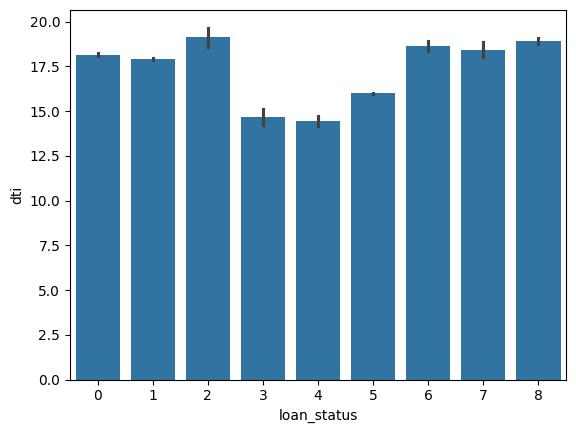

In [227]:
sns.barplot(x='loan_status',y='dti',data=data)

<Axes: xlabel='emp_length', ylabel='dti'>

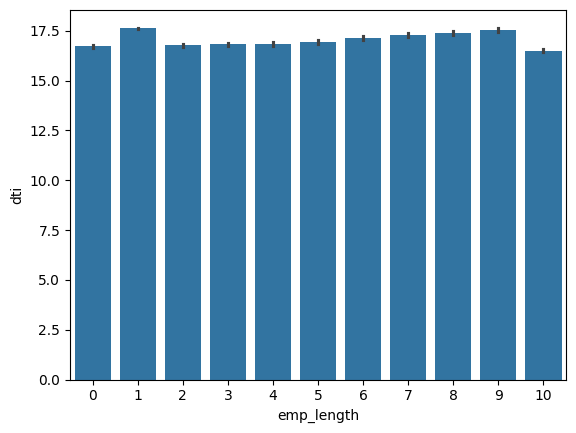

In [228]:
sns.barplot(x='emp_length',y='dti',data=data)

In [229]:
pd.crosstab(data['loan_status'],data['term'],margins=True,normalize=True)

term,0,1,All
loan_status,,,
0,0.058880,0.032212,0.091092
1,0.320630,0.160247,0.480878
2,0.001051,0.000733,0.001784
3,0.001392,0.000240,0.001632
4,0.003837,0.000427,0.004263
5,0.324053,0.072140,0.396193
6,0.004244,0.002503,0.006747
7,0.001649,0.000963,0.002612
8,0.009042,0.005756,0.014798


In [230]:
data['dti'].corr(data['term'])

0.09176341595719423

###Analisis Multivariat

In [231]:
data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,label,earliest_cr_line_year
loan_amnt,1.000000,0.998563,0.994644,0.420957,0.158773,0.955769,0.159311,0.167134,-0.039004,-0.208344,...,0.241310,0.496814,0.496736,0.745545,0.745364,0.601298,0.750918,0.258798,-0.004176,-0.158391
funded_amnt,0.998563,1.000000,0.996367,0.419280,0.159187,0.957808,0.158670,0.166344,-0.039165,-0.208116,...,0.241154,0.499574,0.499497,0.745008,0.745164,0.600858,0.750522,0.258718,-0.003143,-0.157332
funded_amnt_inv,0.994644,0.996367,1.000000,0.420453,0.160072,0.953443,0.155287,0.162838,-0.039922,-0.207939,...,0.241358,0.503622,0.503557,0.739946,0.747288,0.595773,0.748574,0.258024,0.003172,-0.155075
term,0.420957,0.419280,0.420453,1.000000,0.440081,0.189129,0.452361,0.463587,-0.022593,-0.120741,...,0.103721,0.427773,0.427724,0.170898,0.173838,-0.004447,0.559756,0.080844,-0.058383,-0.051761
int_rate,0.158773,0.159187,0.160072,0.440081,1.000000,0.141733,0.944468,0.965058,-0.009698,0.064349,...,-0.036891,0.122494,0.122509,0.107824,0.109847,-0.053398,0.487532,0.048703,-0.171922,0.078400
installment,0.955769,0.957808,0.953443,0.189129,0.141733,1.000000,0.136818,0.143921,-0.034494,-0.176674,...,0.223427,0.403327,0.403270,0.769334,0.768542,0.651825,0.683919,0.264827,-0.007343,-0.142820
grade,0.159311,0.158670,0.155287,0.452361,0.944468,0.136818,1.000000,0.977283,-0.006838,0.061561,...,-0.032001,0.151757,0.151779,0.075436,0.072771,-0.081619,0.455411,0.033330,-0.175989,0.074557
sub_grade,0.167134,0.166344,0.162838,0.463587,0.965058,0.143921,0.977283,1.000000,-0.007146,0.063893,...,-0.033153,0.156461,0.156485,0.081312,0.078534,-0.079949,0.468935,0.035338,-0.180017,0.075620
emp_length,-0.039004,-0.039165,-0.039922,-0.022593,-0.009698,-0.034494,-0.006838,-0.007146,1.000000,0.074420,...,-0.058905,-0.039354,-0.039350,-0.021963,-0.023132,-0.013629,-0.035419,-0.003761,-0.015321,0.117846
home_ownership,-0.208344,-0.208116,-0.207939,-0.120741,0.064349,-0.176674,0.061561,0.063893,0.074420,1.000000,...,-0.241066,-0.110108,-0.110090,-0.160178,-0.161076,-0.140280,-0.134133,-0.086267,-0.044978,0.175413


### Data Modelling

In [232]:
X= data.drop(columns='label')

In [233]:
y=data['label']

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=21)

##Logistic Regression

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
standardscaler= StandardScaler()

In [238]:
X_train_scaled= standardscaler.fit_transform(X_train)
X_test_scaled= standardscaler.fit_transform(X_test)

In [239]:
X_train_scaled

array([[ 0.88086323,  0.88869814,  0.894334  , ...,  1.01759337,
        -0.50983361, -1.33717375],
       [ 0.49362228,  0.49994496,  0.50711572, ..., -0.41362393,
        -0.50248328,  0.9576421 ],
       [-0.86172104, -0.86069117, -0.84814828, ..., -0.90068016,
         0.15994072,  0.44768302],
       ...,
       [-0.45834505, -0.45573994, -0.4447959 , ..., -0.58279898,
        -0.04576863, -0.82721467],
       [ 0.10638133,  0.11119178,  0.11989743, ..., -0.51788604,
        -0.52217737,  1.21262164],
       [ 0.06443023,  0.06907685,  0.07149515, ..., -0.73530007,
         2.10251598,  0.70266256]])

In [240]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(random_state=0).fit(X_train_scaled,y_train)
log_reg.predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 1, 1, 1])

In [241]:
log_reg.score(X_train_scaled,y_train)

0.9563295230683918

In [242]:
log_reg.score(X_test_scaled,y_test)

0.9559927369429393

In [243]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
y_train_pred = log_reg.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Tampilkan laporan klasifikasi lengkap
print("\nClassification Report:\n")
print(classification_report(y_train, y_train_pred))


Accuracy: 0.96
Precision: 0.96
Recall: 0.99

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.71      0.79     37932
           1       0.96      0.99      0.98    288467

    accuracy                           0.96    326399
   macro avg       0.93      0.85      0.88    326399
weighted avg       0.95      0.96      0.95    326399



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report (Training):

              precision    recall  f1-score   support

           0       0.89      0.71      0.79     37932
           1       0.96      0.99      0.98    288467

    accuracy                           0.96    326399
   macro avg       0.93      0.85      0.88    326399
weighted avg       0.95      0.96      0.95    326399


Classification Report (Testing):

              precision    recall  f1-score   support

           0       0.89      0.71      0.79     16242
           1       0.96      0.99      0.98    123644

    accuracy                           0.96    139886
   macro avg       0.93      0.85      0.88    139886
weighted avg       0.95      0.96      0.95    139886



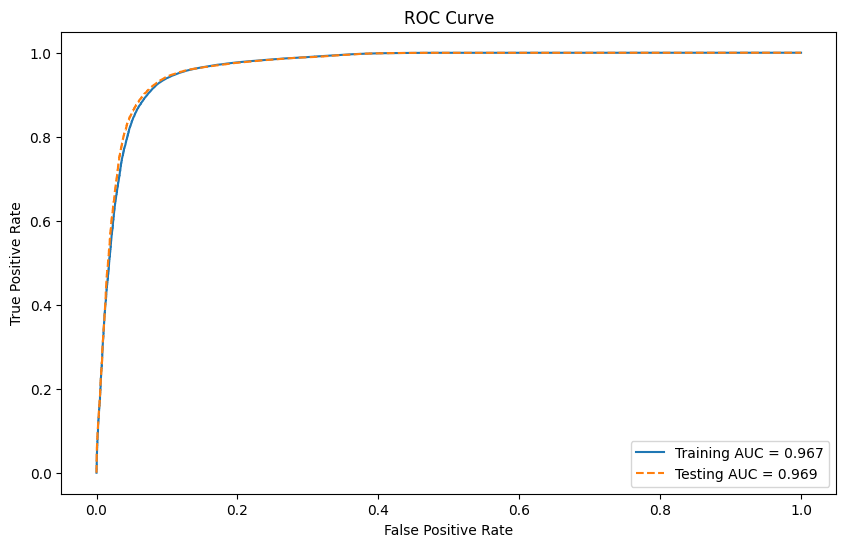

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Training the Logistic Regression model
log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

# Buat prediksi pada data training dan testing
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Hitung akurasi, presisi, dan recall pada data training
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)


# Tampilkan laporan klasifikasi lengkap untuk training dan testing
print("\nClassification Report (Training):\n")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Testing):\n")
print(classification_report(y_test, y_test_pred))

# ROC Curve and AUC for training data
train_fpr, train_tpr, train_threshold = roc_curve(y_train, log_reg.predict_proba(X_train_scaled)[:, 1])
auc_train = auc(train_fpr, train_tpr)

# ROC Curve and AUC for testing data
test_fpr, test_tpr, test_threshold = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
auc_test = auc(test_fpr, test_tpr)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, linestyle='-', label=f'Training AUC = {auc_train:.3f}')
plt.plot(test_fpr, test_tpr, linestyle='--', label=f'Testing AUC = {auc_test:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()


## Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Latih model Random Forest
rf_model = RandomForestClassifier(random_state=20)
a= rf_model.fit(X_train_scaled, y_train)
a.score(X_test_scaled,y_test)

# Buat prediksi pada data training dan testing
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)


Training Accuracy (RF): 1.00
Training Precision (RF): 1.00
Training Recall (RF): 1.00

Testing Accuracy (RF): 1.00
Testing Precision (RF): 1.00
Testing Recall (RF): 1.00

Classification Report (Training - RF):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37932
           1       1.00      1.00      1.00    288467

    accuracy                           1.00    326399
   macro avg       1.00      1.00      1.00    326399
weighted avg       1.00      1.00      1.00    326399


Classification Report (Testing - RF):

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     16242
           1       1.00      1.00      1.00    123644

    accuracy                           1.00    139886
   macro avg       1.00      0.99      0.99    139886
weighted avg       1.00      1.00      1.00    139886



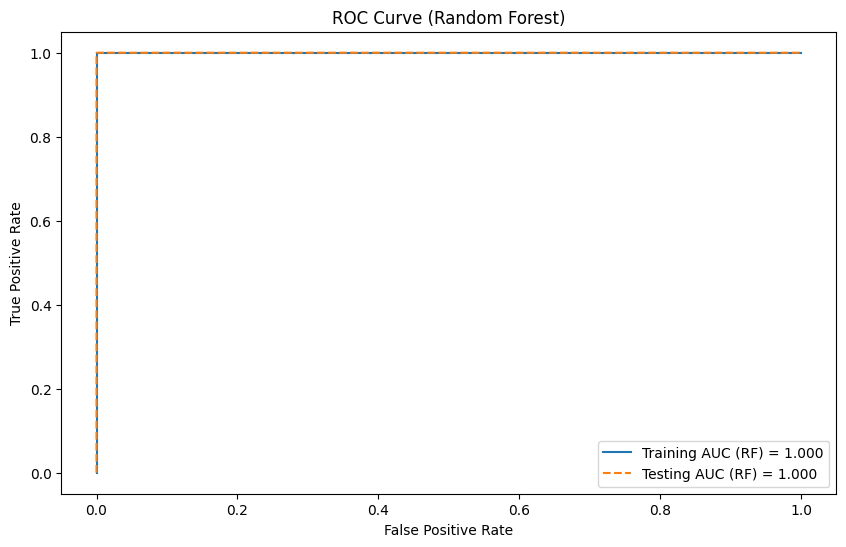

In [246]:


# Hitung akurasi, presisi, dan recall pada data training
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)

# Hitung akurasi, presisi, dan recall pada data testing
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)

# Tampilkan hasilnya
print(f"Training Accuracy (RF): {train_accuracy_rf:.2f}")
print(f"Training Precision (RF): {train_precision_rf:.2f}")
print(f"Training Recall (RF): {train_recall_rf:.2f}")

print(f"\nTesting Accuracy (RF): {test_accuracy_rf:.2f}")
print(f"Testing Precision (RF): {test_precision_rf:.2f}")
print(f"Testing Recall (RF): {test_recall_rf:.2f}")

# Tampilkan laporan klasifikasi lengkap untuk training dan testing
print("\nClassification Report (Training - RF):\n")
print(classification_report(y_train, y_train_pred_rf))

print("\nClassification Report (Testing - RF):\n")
print(classification_report(y_test, y_test_pred_rf))

# ROC Curve and AUC for training data
train_fpr_rf, train_tpr_rf, _ = roc_curve(y_train, rf_model.predict_proba(X_train_scaled)[:, 1])
auc_train_rf = auc(train_fpr_rf, train_tpr_rf)

# ROC Curve and AUC for testing data
test_fpr_rf, test_tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
auc_test_rf = auc(test_fpr_rf, test_tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(train_fpr_rf, train_tpr_rf, linestyle='-', label=f'Training AUC (RF) = {auc_train_rf:.3f}')
plt.plot(test_fpr_rf, test_tpr_rf, linestyle='--', label=f'Testing AUC (RF) = {auc_test_rf:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve (Random Forest)')
plt.show()

